In [2]:
from bunkatech.nested_topic_modeling import nested_topic_modeling
from bunkatech.networks.centroids import find_centroids
import pandas as pd
import bamboolib
import plotly
import pickle
from sklearn.datasets import fetch_20newsgroups

docs = fetch_20newsgroups(subset="all", remove=("headers", "footers", "quotes"))["data"]
df = pd.DataFrame(docs)
df = df.sample(2000)
df = df.reset_index(drop=True)
df.columns = ["text"]
df["bindex"] = df.index

#### Fit the model

In [3]:
model = nested_topic_modeling()

bunka = model.fit(
    df,
    text_var="text",
    index_var="bindex",
    sample_size=2000,
    sample_terms=2000,
    embeddings_model="tfidf",
    ngrams=(1, 2),
    ents=False,
    language="en",
    db_path=".",
)

Embeddings..
Reducing the vectors..
UMAP(angular_rp_forest=True, metric='cosine', n_components=5, n_neighbors=10, verbose=True)
Wed Feb 23 16:16:30 2022 Construct fuzzy simplicial set
Wed Feb 23 16:16:30 2022 Finding Nearest Neighbors
Wed Feb 23 16:16:32 2022 Finished Nearest Neighbor Search
Wed Feb 23 16:16:34 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Wed Feb 23 16:16:37 2022 Finished embedding
Extract Terms...


100%|█████████████████████████████████████████████████████████████| 1956/1956 [01:34<00:00, 20.77it/s]


#### Visualize embeddings for a given nested level

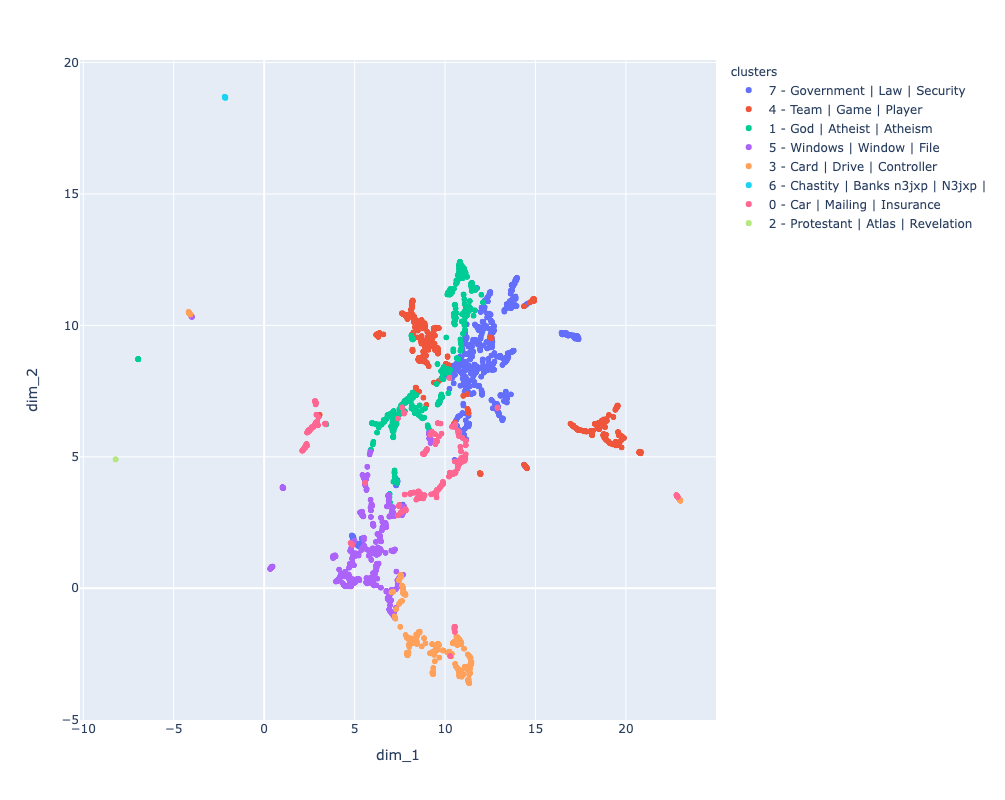

In [4]:
fig = model.visualize_embeddings(nested_level = 0, width = 800, height = 800)
fig.show()
#plotly.offline.plot(fig, auto_open=True, filename="saved_graph/embeddings.html")

#### Get the centroids elements

In [5]:
df_centroid = model.get_centroid_documents(nested_level= 0, top_elements = 2)
df_centroid

clusters                                      centroid_docs  \
0         0  I have an '89 Kawasaki KX 80.  It is in mint c...   
1         1  : |> Let me begin by saying I think this is th...   
2         2  \n\n\tUp to that point I thought you were talk...   
3         3  Hi Everybody,\n\n      I am interested in the ...   
4         4  \n\nI had a similar experience.  We had a writ...   
5         5  We are in the process of evaluating X-terminal...   
6         6  \n\nGosh, Jesse is that famous now?  He was my...   
7         7  ------------- cut here -----------------\nlimi...   

                                          farest_doc  cluster_radius  
0  1993 World Championships in Germany:\n =======...        2.825926  
1  \n\n\nARGHHHHHHHHHh\n\nREAD THE MEMOS!!!!\n\nI...        2.900697  
2  My original post:\n\nAha, I think I found the ...        0.352416  
3  I am auctioning off the following comics.  The...        2.713860  
4  \n:Lighter fluid is butane.  It's absolutely n...        2.353851  
5  Hey,\n\n   I am looking for C-algorithm, which...        2.259474  
6  JL> From: jlecher@pbs.org\nJL> > I would not c...        0.257109  
7  \n\nMy MDC cipher (which uses any one-way hash...        2.538235

#### Access the Bunka Visualization

In [6]:
plotly.offline.plot(bunka.sankey, auto_open=True, filename="saved_graph/sankey.html")
plotly.offline.plot(bunka.treemap, auto_open=True, filename="saved_graph/treemap.html")
plotly.offline.plot(
    bunka.sunburst, auto_open=True, filename="saved_graph/sunburst.html"
)

'saved_graph/sunburst.html'

#### Get informations computed by the moded

In [8]:
terms = bunka.terms
df_cluster_names = bunka.h_clusters_names
df = bunka.df
df_embeddings = bunka.embeddings
df_indexed = bunka.indexed_terms
df_cluster_number = bunka.h_clusters_number